# CryptoBot - Bot de trading con inteligencia artificial para criptomonedas

## Primero instalamos la biblioteca de Python necesaria para conectarnos con la API de Binance


In [1]:
import sys
!{sys.executable} -m pip install python-binance

You should consider upgrading via the 'C:\Users\REI\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
from binance.client import Client

# Keys
API_KEY = "FeeMWzRAnK901yrWojYpoVadSfEYEPjqWwXyBU0LirmPmY8rTBgWdsaoc4Z0ywor"
API_SECRET = "Ro6KcR4zMhfywSvJ4ay9Gkqlpop6rdfan0A7qo4Xe3SL1OgBT8YgyITTN2uOxqhj"

client = Client(API_KEY, API_SECRET, tld='com')

## Luego instalamos las bibliotecas necesarias para poder graficar y realizar cálculos

In [3]:
#import sys
#!{sys.executable} -m pip install matplotlib as plt
#importo las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import math

## Definimos la función objetivo para el Algoritmo Genético

In [4]:
# utilidad_criptos es un arreglo que contiene el posible porcentaje de utilidad (ganancia) asociado a cada criptomoneda

def fx(individuo, utilidad_criptos):
    utilidad_total = 0
    for i,j in zip(individuo, utilidad_criptos):
        utilidad_total += i*j
    return utilidad_total

### Definimos la población a partir de una matriz de individuos generados aleatoriamente

In [5]:
genetic_pool = [0,1]
poblacion = []

for i in range(20):
    individuo = list(np.random.choice(genetic_pool,20))
    poblacion.append(individuo)

# Mostramos la población
print(poblacion)

[[0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1], [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1], [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0], [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1], [0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0], [1, 0, 

### Definimos un arreglo de porcentajes aleatorios de utilidad asociados a cada criptomoneda

In [6]:
utilidad_individuo = list(np.random.rand(20))
print(utilidad_individuo)

[0.7940895848493861, 0.24436883833444267, 0.5883706106574397, 0.6968586341716937, 0.7954728146737975, 0.3435865314482225, 0.184095555957276, 0.29216247814761453, 0.6448406277508668, 0.9799409212079493, 0.7019971245559348, 0.9482084141322773, 0.47088672271642207, 0.6087322919832816, 0.10421640228042428, 0.8821015796561733, 0.097227817669992, 0.9515653092191642, 0.053594415568442244, 0.9685231623058107]


### Definimos un entero para cada criptomoneda para identificarlas en la gráfica

In [7]:
x_axis = []

for i in range(1,21):
    x_axis.append(i)

print(x_axis)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


### Obtenemos para cada individuo la utilidad total devuelta por la función objetivo 

In [8]:
y_axis = []

for individuo in poblacion:          
    y_axis.append(fx(individuo,utilidad_individuo))    

### Graficamos Individuos vs Utilidad total

Text(0, 0.5, 'Utilidad total')

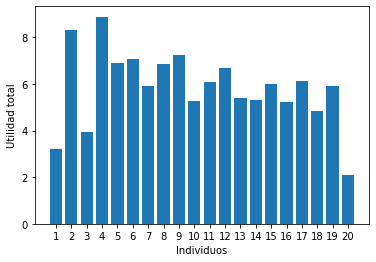

In [9]:
plt.bar(x_axis,y_axis)
plt.xticks(x_axis)

plt.xlabel("Individuos")
plt.ylabel("Utilidad total")

## Ahora definimos la función restricción

In [10]:
#perdida_individuo = list(np.random.rand(20))
perdida_individuo = list(np.random.uniform(low=0.1, high=0.3, size=(20,)))
print(perdida_individuo)
perdida_total_asumida = .02
perdida_criptos = []
for i in perdida_individuo:
    perdida_criptos.append(i * perdida_total_asumida)

print(perdida_criptos)
# perdida_criptos es un arreglo que contiene el posible porcentaje de perdida asociado a cada criptomoneda


[0.29128295468301313, 0.24137031847562074, 0.2485053634381569, 0.12483519893896292, 0.26333290968685275, 0.22897056323318113, 0.15600849804192068, 0.2674596282898738, 0.19300340591838755, 0.15307351045948953, 0.1828342054219359, 0.2372786422351719, 0.2575692816187932, 0.2414077242585297, 0.29628624770101475, 0.2398563227232708, 0.15543135332956418, 0.106270433148371, 0.2412278604141178, 0.20544936666818947]
[0.005825659093660263, 0.004827406369512415, 0.004970107268763138, 0.0024967039787792585, 0.005266658193737055, 0.004579411264663623, 0.003120169960838414, 0.005349192565797476, 0.0038600681183677513, 0.0030614702091897907, 0.003656684108438718, 0.004745572844703438, 0.005151385632375865, 0.004828154485170594, 0.005925724954020295, 0.0047971264544654155, 0.003108627066591284, 0.0021254086629674197, 0.004824557208282356, 0.004108987333363789]


### Ahora pasamos el arreglo de pérdidas por un filtro

In [11]:
def rx(individuo, perdida_criptos):
    perdida_total = 0
    for i,j in zip(individuo, perdida_criptos):
        perdida_total += i*j
    return perdida_total

y_axis = []

for individuo in poblacion:          
    y_axis.append(rx(individuo,perdida_criptos))

Text(0, 0.5, 'Pérdida total')

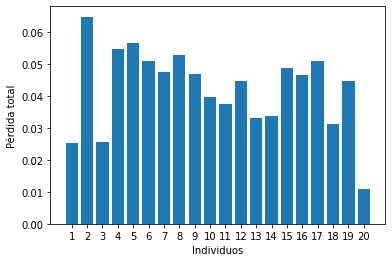

In [12]:
plt.bar(x_axis,y_axis)
plt.xticks(x_axis)

plt.xlabel("Individuos")
plt.ylabel("Pérdida total")

### Creamos una nueva población

In [13]:
genetic_pool = [0,1]
poblacion = []

for i in range(20):
    individuo = list(np.random.choice(genetic_pool,20))
    poblacion.append(individuo)

# Mostramos la población
print(poblacion)

[[0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1], [1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1], [1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0], [0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], [0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], [1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1], [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1], [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1], [1, 0, 

### Filtramos los individuos de interés, los que no superen el 3% de pérdida

In [14]:
poblacion_filtrada = []
poblacion_apta = []

while len(poblacion_apta) < 20: 
    individuo = list(np.random.choice(genetic_pool,20))    
    if(rx(individuo, perdida_criptos) <= 0.03):
        poblacion_apta.append(individuo)
        
print("Población apta: ", poblacion_apta)

#def filtrar(perdidas_totales):
#    
#    poblacion = []
#    for perdida_individuo in perdidas_totales:       
#        if(perdida_individuo <= 0.03):
#            poblacion.append(perdida_individuo)
#    return poblacion

#poblacion_filtrada = crear_poblacion(y_axis)

# Pérdidas totales filtradas
#print(poblacion_filtrada)

Población apta:  [[1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1], [0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1], [0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0], [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 

In [15]:
y_axis = []

for individuo in poblacion_apta:          
    y_axis.append(rx(individuo,perdida_criptos))

Text(0, 0.5, 'Pérdida total')

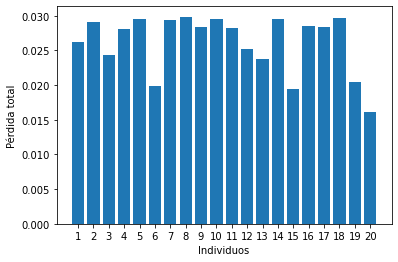

In [16]:
plt.bar(x_axis,y_axis)
plt.xticks(x_axis)

plt.xlabel("Individuos")
plt.ylabel("Pérdida total")

### Buscamos la utilidad máxima para esta población apta

In [17]:
x_axis = []

for i in range(1,21):
    x_axis.append(i)

print("Eje X", x_axis)

y_axis = []

for individuo in poblacion_apta:          
    y_axis.append(fx(individuo,utilidad_individuo))
    
print("Eje Y", y_axis)

Eje X [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Eje Y [2.964039301014558, 5.236338193288723, 3.7165645028505003, 3.904041678039395, 3.6981422420201557, 1.583904415457242, 4.633473189297834, 5.448973208219038, 3.2994667285076487, 4.8956704703641005, 4.697842344522803, 3.7282385229634882, 2.360208652046407, 4.407351356779011, 2.6136739428260207, 3.2821539125383414, 4.024525411240221, 3.496243833270275, 2.6565579723262203, 3.27307677389757]


Text(0, 0.5, 'Utilidad total')

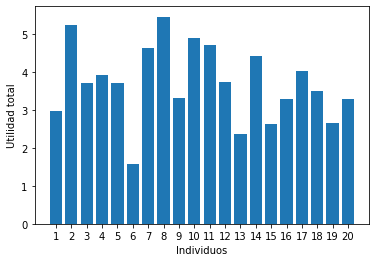

In [18]:
plt.bar(x_axis,y_axis)
plt.xticks(x_axis)

plt.xlabel("Individuos")
plt.ylabel("Utilidad total")

### Ahora aplicamos la función Fitness

In [19]:
fitness =[]

#extraigo los valores de y para medir su éxito
for individuo in poblacion_apta:  
    y = fx(individuo,utilidad_individuo)
    fitness += [y]
    
#convierto fitnees en un vector para realizar operaciones
#más fácilmente
fitness = np.array(fitness)

#divido todos los valores de y para la suma total
#y así obtener valores entre 0 y 1
fitness=fitness/fitness.sum()

In [20]:
print(fitness)

[0.04009767 0.07083744 0.05027787 0.05281407 0.05002865 0.02142714
 0.06268185 0.07371398 0.04463535 0.06622887 0.06355264 0.0504358
 0.03192902 0.05962287 0.03535791 0.04440114 0.05444398 0.04729736
 0.03593805 0.04427834]


### Entrecruzamiento

Tomamos el tamaño de la población e iteramos en el rango de la mitad de la población. Luego escogemos 1 individuo de dicha población con una probabilidad fitness.

In [21]:
ind_size = 20
size_poblacion = len(poblacion_apta)
#hijos
offspring = []
while len(offspring) < 20:
    parents = np.random.choice(size_poblacion, 2, p=fitness)
    cross_point = np.random.randint(ind_size)
    individuo_1 = poblacion_apta[parents[0]][:cross_point] + poblacion_apta[parents[1]][cross_point:]
    individuo_2 = poblacion_apta[parents[1]][:cross_point] + poblacion_apta[parents[0]][cross_point:]
    #print("Individuo 1", individuo_1)
    #print("Individuo 2", individuo_2)
    #offspring.append(individuo_1)
    #offspring.append(individuo_2) 
    if(rx(individuo_1, perdida_criptos) <= 0.03):
        offspring.append(individuo_1)
    if(rx(individuo_2, perdida_criptos) <= 0.03):
        offspring.append(individuo_2) 

In [22]:
offspring[:20]

[[1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0],
 [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [23]:
x_axis = []

for i in range(1,21):
    x_axis.append(i)

y_axis = []

poblacion_apta = offspring

for individuo in poblacion_apta:          
    y_axis.append(fx(individuo,utilidad_individuo))
    
print("y_axis: ", y_axis)

y_axis:  [5.32228010351638, 4.321409446551354, 2.9759477704253965, 2.5277206709644644, 3.3162497217637474, 2.1699497161651715, 4.798439519686408, 2.753788923003912, 3.904041678039395, 5.448973208219038, 3.8789680477519264, 2.5232218188886426, 3.0973754544521346, 2.801089958637356, 2.400742320644587, 3.91107386420159, 4.353756941210569, 3.7282385229634882, 3.27307677389757, 2.616156900102867]


Text(0, 0.5, 'Utilidad total')

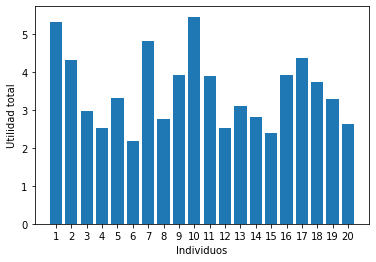

In [24]:
plt.bar(x_axis,y_axis)
plt.xticks(x_axis)

plt.xlabel("Individuos")
plt.ylabel("Utilidad total")

### Mutación

In [25]:
def mutate(individuals, prob):    
    probabilidades_mutacion = []
    for i in range(len(individuals)):        
        individuo_mutante = individuals[i]           
        probabilidades_mutacion = list(np.random.random(20))
        #print("probabilidades_mutacion", probabilidades_mutacion)
        j = 0
        for gen, prob_mut in zip(individuo_mutante, probabilidades_mutacion):
            #print("prob_mut", prob_mut)
            if(prob_mut < prob):
                if(gen == 0):
                    gen = 1
                    individuo_mutante[j] = gen
                else:
                    gen = 0
                    individuo_mutante[j] = gen
            
            j += 1
        
        #print(individuo_mutante)
            
        if individuo_mutante != individuals[i]:
            print("Mutó " + str(i) + "por " + str(individuo_mutante))
            if (rx(individuo_mutante, perdida_criptos) <= 0.03):
                individuals[i] = individuo_mutante
                print("Se cambió el individuo " + str(i) + " por: " + str(individuo_mutante))

In [26]:
mutate(poblacion_apta,0.1)

In [27]:
poblacion_apta[:20]

[[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1],
 [1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0],
 [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1],
 [0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
 [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
 [1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,

## Ahora obtenemos de Binance el diccionario con todas las criptomonedas y los datos asociados a estas

In [28]:
def GET_ALL_TICKERS():

    list_tickers = client.GET_ALL_TICKERS()

    for ticker in list_tickers:
        symbol = ticker['symbol']
        price = ticker['price']

        print("Símbolo: " + symbol + " Precio: " + price)

## Definimos la función que calculará las Medias Móviles Simples

In [29]:
def SMA_INTERVAL_4HRS(period, ticker):
    closing_price_list = []

    data_historical = client.get_historical_klines(ticker, Client.KLINE_INTERVAL_4HOUR, '800 hour ago UTC')

    #print("Candles: ", len(data_historical))

    sum = 0

    if len(data_historical) == 200:
        
        for i in range((200 - period), 200):
            #print(data_historical[i])

            sum += float(data_historical[i][4])

        sma = round((sum / period), 3)        

        print("SMA: " +  ticker + " Periodo " + str(period) + ": " + str(sma))

        return(sma)

    else:
        print("No se pudo obtener el historial de velas")

## Definimos la función que calculará las Medias Móviles Exponenciales

In [30]:
def EMA_INTERVAL_4HRS(period, ticker):
    closing_price_list = []
    ema = []

    data_historical = client.get_historical_klines(ticker, Client.KLINE_INTERVAL_4HOUR, '1000 hour ago UTC')

    #print("Velas: ", len(data_historical))

    sma = SMA_INTERVAL_4HRS(period, ticker)
    ema.append(sma)

    if len(data_historical) == 250:
        
        for i in range(len(data_historical)):
            closing_price_list.append(float(data_historical[i][4]))

        for price in closing_price_list[period:]:
            ema.append( (price * (2/(period + 1))) + ema[-1] * (1 - (2/(period + 1))) )

            #print("Cantidad de elementos: ", len(ema))

            #for i in ema:
            #    print(i)

            ema_value = round(ema.pop(), 3)

            print("EMA: " + ticker + " Periodo: " + str(period) + " : " + str(ema_value))

            return(ema_value)

    else:
        print("No se pudo obtener el historial de velas")

## Ejecutamos las pruebas

In [31]:
print("---- Medias Móviles Simples ----")

sma4 = SMA_INTERVAL_4HRS(4, 'ADABUSD')
sma9 = SMA_INTERVAL_4HRS(9, 'ADABUSD')
sma18 = SMA_INTERVAL_4HRS(18, 'ADABUSD')

if sma4 > sma9 and sma4 > sma18:
    print("Se está cumpliendo la estrategia Triple Cruce SMA 4 9 18")

print('\n')
print("---- Medias Móviles Exponenciales ----")
    
ema4 = EMA_INTERVAL_4HRS(4, 'ADABUSD')
ema9 = EMA_INTERVAL_4HRS(9, 'ADABUSD')
ema18 = EMA_INTERVAL_4HRS(18, 'ADABUSD')

if ema4 > ema9 and ema4 > ema18:
    print("Se está cumpliendo la estrategia Triple Cruce EMA 4 9 18")

---- Medias Móviles Simples ----
SMA: ADABUSD Periodo 4: 1.05
SMA: ADABUSD Periodo 9: 1.055
SMA: ADABUSD Periodo 18: 1.084


---- Medias Móviles Exponenciales ----
SMA: ADABUSD Periodo 4: 1.05
EMA: ADABUSD Periodo: 4 : 1.156
SMA: ADABUSD Periodo 9: 1.055
EMA: ADABUSD Periodo: 9 : 1.106
SMA: ADABUSD Periodo 18: 1.084
EMA: ADABUSD Periodo: 18 : 1.097
Se está cumpliendo la estrategia Triple Cruce EMA 4 9 18
